In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import xarray as xa

In [129]:
path = '/Users/bell/ecoraid/2022/Moorings/22bsp14a/final_data_cf/*.nc'

xdf = xa.open_mfdataset(path).load()
xdf

<xarray.Dataset> Size: 24MB
Dimensions:                (time: 8638, latitude: 1, longitude: 1, depth: 16)
Coordinates:
  * time                   (time) datetime64[ns] 69kB 2022-09-09T04:00:00 ......
  * latitude               (latitude) float64 8B 64.0
  * longitude              (longitude) float64 8B -167.9
  * depth                  (depth) float64 128B 1.0 3.0 5.0 ... 28.0 30.0 32.0
Data variables: (12/22)
    chlor_fluorescence     (time, depth, latitude, longitude) float64 1MB nan...
    turbidity              (time, depth, latitude, longitude) float64 1MB nan...
    chlor_fluorescence_QC  (time, depth, latitude, longitude) float64 1MB nan...
    cdom                   (time, depth, latitude, longitude) float64 1MB nan...
    temperature            (time, depth, latitude, longitude) float64 1MB nan...
    conductivity           (time, depth, latitude, longitude) float64 1MB nan...
    ...                     ...
    w_curr_comp            (latitude, longitude, time, depth) float64 1MB nan...
    w_curr_comp_err        (latitude, longitude, time, depth) float64 1MB nan...
    agc1                   (latitude, longitude, time, depth) float64 1MB nan...
    agc2                   (latitude, longitude, time, depth) float64 1MB nan...
    agc3                   (latitude, longitude, time, depth) float64 1MB nan...
    agc4                   (latitude, longitude, time, depth) float64 1MB nan...
Attributes: (12/15)
    Latitude_DegMMddW:                      63 59.977 N
    Longitude_DegMMddN:                     167 55.523 W
    MooringID:                              22BSP-14A
    platform_deployment_date:               2022-09-09T04:00:00Z
    platform_deployment_cruise_name:        AQ2201
    platform_recovery_date:                 2023-09-02T02:13:00Z
    ...                                     ...
    InstrumentSerialNumber:                 4878
    InstrumentType:                         Eco-Fluorometer FLNTUSB
    date_created:                           2023-11-02T11:41:00Z
    date_modified:                          2023-11-02 11:45:40.135256
    QC_indicator:                           ProbablyGood
    history:                                Trimmed to deployment.\nTrimmed t...

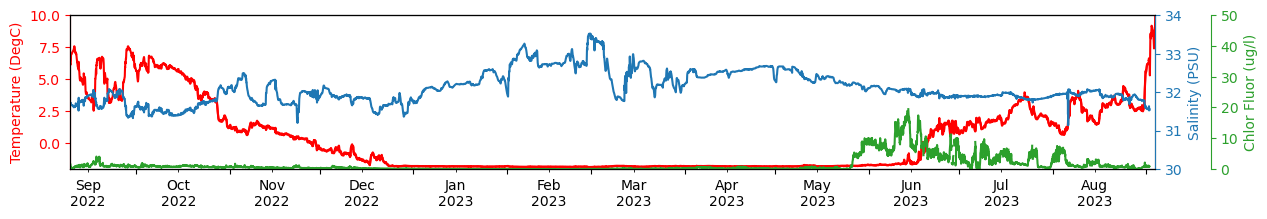

In [131]:
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter
import matplotlib.ticker as ticker

fig, ax = plt.subplots(1,figsize=(14, 2))

ax.plot(xdf.time,xdf.isel({'latitude':0,'longitude':0}).temperature,'r', label='temperature')
ax2 = ax.twinx()
ax2.plot(xdf.time,xdf.isel({'latitude':0,'longitude':0}).salinity,'C0', label='salinity')
ax3 = ax.twinx()
ax3.plot(xdf.time,xdf.isel({'latitude':0,'longitude':0}).chlor_fluorescence,'C2', label='chlorophyll fluor.')

ax.set_ylabel('Temperature (DegC)',c='r')
ax2.set_ylabel('Salinity (PSU)',c='C0')
ax3.set_ylabel('Chlor Fluor (ug/l)',c='C2')
ax2.spines['right'].set_color('C0')
ax3.spines['right'].set_color('C2')
ax3.spines['right'].set_position(('outward',40))
ax2.spines['left'].set_color('r')

ax.tick_params(axis='y', colors='r')
ax2.tick_params(axis='y', colors='C0')
ax3.tick_params(axis='y', colors='C2')

ax.set_xlim([xdf.time.min(),xdf.time.max()])
ax.set_ylim([-2,10])
ax2.set_ylim([30,34])
ax3.set_ylim([0,50])

ax.xaxis.set_major_locator(DayLocator(bymonthday=1))
ax.xaxis.set_minor_locator(DayLocator(bymonthday=15))
ax.xaxis.set_minor_formatter(DateFormatter('%b\n%Y'))
ax.xaxis.set_major_formatter(DateFormatter(''))
ax.xaxis.set_tick_params(which='major', pad=3)
ax.xaxis.set_tick_params(which='minor', pad=5)

In [122]:
fig.tight_layout()
fig.savefig(path.replace('final_data_cf/*.nc','visualizations/TS.png'))


In [132]:
xdf.to_dataframe().to_csv(path.replace('final_data_cf/*.nc','working/data.csv'))

OSError: Cannot save file into a non-existent directory: '/Users/bell/ecoraid/2022/Moorings/22bsp14a/working'